# # Thoughts on the Network

* Created the basic vannila architecture in such a way that increase the channels from 32 in each layer upto 256 and decrease back to 32 with one maxpooling layer after three convolutions
* In this architecture i have observed that by using incremental architecture number of parameters gets huge and felt that these many parameters are not required for simple datasets


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
#Loading the mnist data Splitting the data into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


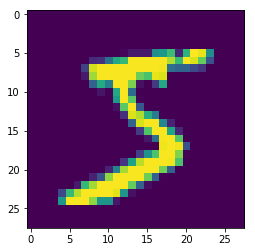

In [0]:
print (X_train.shape) #Print the shape of the train data
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]) #Print the first image from the train data

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
#Print the 
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Ip : 28*28*1 ;  Rec field : 3*3 ; O/P : 26*26*32
model.add(Convolution2D(64, 3, 3, activation='relu')) # Ip : 26*26*32   Rec field : 5*5  ; O/P : 24*24*64
model.add(Convolution2D(128, 3, 3, activation='relu')) # Ip : 24*24*64   Rec field : 7*7  ; O/P : 22*22*128

model.add(MaxPooling2D(pool_size=(2, 2))) # Ip : 22*22*128   Rec field : 14*14  ; O/P : 11*11*128

model.add(Convolution2D(256, 3, 3, activation='relu')) # Ip : 11*11*128   Rec field : 16*16  ; O/P : 9*9*256
model.add(Convolution2D(128, 3, 3, activation='relu')) # Ip : 9*9*256   Rec field : 18*18  ; O/P : 7*7*512
model.add(Convolution2D(64, 3, 3, activation='relu')) # Ip : 7*7*512   Rec field : 20*20  ; O/P : 5*5*1024
model.add(Convolution2D(32, 3, 3, activation='relu')) # Ip : 5*5*1024   Rec field : 22*22  ; O/P : 3*3*2048
model.add(Convolution2D(10, 3, 3, activation='relu')) # Ip : 3*3*2048   Rec field : 24*24  ; O/P : 1*1*10

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 128)         295040    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 64)          73792     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

In [0]:
#Compiling the model with loss function as cross entropy and optimizer using adam with evaluation metric as accuracy
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
#Run the model with the batch size as 32 i.e. running 32 records as one batch, number of ephocs as 10 and verbose(output format) as 1
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
  352/60000 [..............................] - ETA: 23s - loss: 0.9309 - acc: 0.6847

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 18s 295us/step - loss: 0.7858 - acc: 0.7635 - val_loss: 0.7039 - val_acc: 0.7981
Epoch 2/15
60000/60000 [==============================] - 18s 293us/step - loss: 0.7082 - acc: 0.7957 - val_loss: 0.7007 - val_acc: 0.7980
Epoch 3/15
60000/60000 [==============================] - 18s 302us/step - loss: 0.7027 - acc: 0.7974 - val_loss: 0.7016 - val_acc: 0.7978
Epoch 4/15
60000/60000 [==============================] - 18s 294us/step - loss: 0.7019 - acc: 0.7973 - val_loss: 0.7045 - val_acc: 0.7982
Epoch 5/15
60000/60000 [==============================] - 18s 292us/step - loss: 0.6994 - acc: 0.7979 - val_loss: 0.7140 - val_acc: 0.7968
Epoch 6/15
60000/60000 [==============================] - 18s 297us/step - loss: 0.6991 - acc: 0.7981 - val_loss: 0.6992 - val_acc: 0.7987
Epoch 7/15
60000/60000 [==============================] - 18s 297us/step - loss: 0.6958 - acc: 0.7992 - val_loss: 0.7231 - val_acc: 0.7954
Epoch 8/15
60000/60000 [==============

In [0]:
# Evaluate the model and store the scores in a variable
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
#Predict the model with the test data
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9]) #Print the prediction results for 0 to 10 images in y_pred dataframe
print(y_test[:9])# Print the output from 0 to 10 images

### What according to me wrong in this network?

model.add(Convolution2D(2048, 3, 3, activation='relu')) # Ip : 5*5*1024   Rec field : 22*22  ; O/P : 3*3*2018
model.add(Convolution2D(10, 3, 3, activation='relu')) # Ip : 3*3*2048   Rec field : 24*24  ; O/P : 1*1*10

1. When you observe the above two steps from the model, we are converting the 2048 channels to 10 channels with 3*3 kernel due to which we may loose most of the data. We can achieve this by using padding or convolve using 1*1 kernel but this cannot be used according to EVA as of now

2. Also have observed channels are being added up for each layer due to which parameters are getting increased instead we can use 32 channels overall and convolute to 10 channels by which we will not loose much information